# A heading
#### smaller heading

this is just text $c = \sqrt{a^2+b^2}$. on its own line:
$$
E=mc^2
$$
you can also do lists:
- first
- second
- third
and that's it. Here is a [link to google](https://www.google.com)

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | \$1600 |
| col 2 is      | centered      |   \$12 |
| zebra stripes | are neat      |    \$1 |

In [3]:
#=
this is a comment
that spans multiple lines
=#
x=2+3
y=1+1;

println("the answer is: ", x+y)

the answer is: 7


Julia can also use unicode symbols. Type \pi and press tab to create the pi character.

In [4]:
2π

6.283185307179586

Other symbols can be defined as variables as well. For example, typing \turtle and tab gives:

In [79]:
🐢 = 5

5

In [80]:
🐢^2

25

Generally speaking, I would not suggest using symbols in code. However, some Julia code will use symbols (such as greek letters), so it is good to understand how it works.

Julia also natively supports vectors and matrices:

In [7]:
x = [1 2 3]

1Ã—3 Array{Int64,2}:
 1  2  3

In [8]:
y = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [81]:
x*y

1-element Vector{Int64}:
 14

In [13]:
A = [1 2 3; 4 5 6]

2Ã—3 Array{Int64,2}:
 1  2  3
 4  5  6

In [84]:
A = []

0-element Array{Any,1}

In [85]:
push!(A, "hello")

1-element Array{Any,1}:
 "hello"

In [86]:
push!(A, rand(2,3))

2-element Array{Any,1}:
 "hello"                                                 
 [0.795162 0.338256 0.729517; 0.263179 0.822404 0.507274]

In [87]:
push!(A, A)

3-element Array{Any,1}:
 "hello"                                                                                                  
 [0.795162 0.338256 0.729517; 0.263179 0.822404 0.507274]                                                 
 Any["hello", [0.795162 0.338256 0.729517; 0.263179 0.822404 0.507274], Any[#= circular reference @-1 =#]]

We can also create arrays using the range functionality:

In [85]:
x = 1:5
y = 10:-2:0

for i in x
    print(i, " ")
end
println("")
for j in y
    print(j, " ")
end

1 2 3 4 5 
10 8 6 4 2 0 

We can use this functionality to make writing loops easier.

In [87]:
x = [3 4 5 6 7]
for i in 1:4
    println(x[i]*x[i+1])
end

12
20
30
42


We can generate vectors of uniformly random variables with:

In [89]:
x = rand(5)

5-element Vector{Float64}:
 0.6927766605062684
 0.7675189403350423
 0.8910312685254971
 0.2894409354856553
 0.11519921553546297

In [90]:
for i in 3:5
    println(x[i])
end

0.8910312685254971
0.2894409354856553
0.11519921553546297


There are some special vectors in Julia.

In [106]:
x = ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [107]:
y = zeros(3)

3-element Vector{Float64}:
 0.0
 0.0
 0.0

We can also create the identity matrix using these vectors with the LinearAlgebra package.

In [109]:
#If you have not used LinearAlgebra before, call
#using Pkg
#Pkg.add("LinearAlgebra")

using LinearAlgebra
I = diagm(ones(3))

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

Copying vectors in Julia requires using the copy command, using = only makes a reference to the same vector. See the below example:

In [90]:
x

5-element Array{Float64,1}:
 0.148972
 0.42514 
 0.591444
 0.624182
 0.703856

In [41]:
y = x

5-element Array{Float64,1}:
 0.309248
 0.351407
 0.472381
 0.506109
 0.634877

In [42]:
y

5-element Array{Float64,1}:
 0.309248
 0.351407
 0.472381
 0.506109
 0.634877

In [43]:
x[1] = 2

2

In [44]:
x

5-element Array{Float64,1}:
 2.0     
 0.351407
 0.472381
 0.506109
 0.634877

In [45]:
y

5-element Array{Float64,1}:
 2.0     
 0.351407
 0.472381
 0.506109
 0.634877

In [46]:
z = copy(x)

5-element Array{Float64,1}:
 2.0     
 0.351407
 0.472381
 0.506109
 0.634877

In [47]:
x[2] = 6

6

In [48]:
x

5-element Array{Float64,1}:
 2.0     
 6.0     
 0.472381
 0.506109
 0.634877

In [49]:
y

5-element Array{Float64,1}:
 2.0     
 6.0     
 0.472381
 0.506109
 0.634877

In [50]:
z

5-element Array{Float64,1}:
 2.0     
 0.351407
 0.472381
 0.506109
 0.634877

Another useful type of data structure in Julia is dictionaries. Dictionaries map a key to a value. For example:

In [94]:
mydictionary = Dict([("A",1),("B",2)])
mydictionary["B"]

2

We can also add elements to our dictionary over time.

In [97]:
mydictionary["C"] = 3
for (key, value) in mydictionary
    println("key = ", key, " value = ", value)
end

key = B value = 2
key = A value = 1
key = C value = 3


Plotting is also relatively easy in Julia.

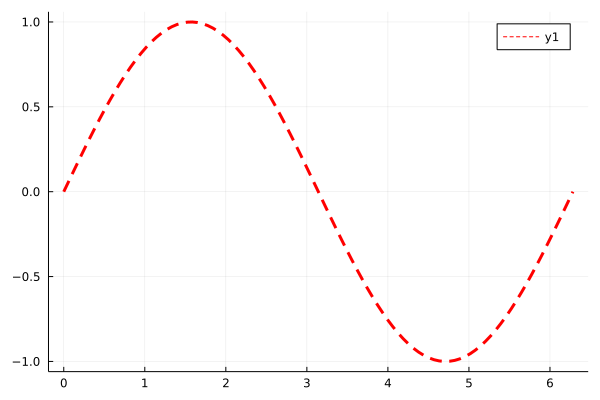

In [104]:
#If you haven't used Plots before, run
#using Pkg
#Pkg.add("Plots")
using Plots

x = LinRange(0,2π, 100)
y = sin.(x)
plot(x,y,linestyle=:dash,linecolor=:red,linewidth=3)

We can also do fancier plotting.

In [105]:
#Example from https://docs.juliaplots.org/stable/
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10


┌ Info: Saved animation to 
│   fn = c:\Users\monei\Julia\STOR415\JuliaTutorial\tmp.gif
└ @ Plots C:\Users\monei\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("c:\\Users\\monei\\Julia\\STOR415\\JuliaTutorial\\tmp.gif")